# SALES ANALYSIS

## INDEX
1. Introduction 
2. Knowing the Dataset
3. Data Wrangling 
4. Data Analysis 



 ## 1. Introduction

Data exploration to analyze business problems, we will look into a 12 months worth of sale data and give insights by answering the following questions: 

- What was the best month for sales? How much was earned that month?
- What city sold the most product?
- What product sold the most? Why do you think it sold the most?

## Import necessary libraries

In [254]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os 
pd.set_option('display.float_format', '{:.2f}'.format)

### Merge our data into one csv file for better analysis

In [35]:
path = r"C:/Users/fabri/Portfolio/Sales_Analysis/raw_data"
files = [files for files in os.listdir(path)]
all_months = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months = pd.concat([all_months,current_data])

all_months.to_csv(path+"/"+"sales_2019.csv", index =False)
    

## 2.Knowing the dataset

### looking at the data

In [57]:
df  = pd.read_csv(path+"/"+"sales_2019.csv")

In [74]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [75]:
df.tail(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


#### the dataset has 186850 entries with 6 columns as shown bellow:

In [53]:
df.shape

(186850, 6)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


#### I wont change the name of the columns since they are clearly described

In [59]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

#### all columns are object type, I will handle it later on 

In [54]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

## 3.Data Wrangling

### Looking for NaN values

#### We have a total  545 rows with NaN values

In [83]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

#### getting rid of them 

In [91]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


### Changing datatypes


In [99]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [143]:
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"], downcast='integer', errors="ignore")
df["Price Each"] = pd.to_numeric(df["Price Each"], errors = "ignore")


In [170]:
df["Order Date"] = pd.to_datetime(df["Order Date"], errors = "coerce")

In [174]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

### Adding new columns

#### We will add columns Month, City and Sales

In [200]:
df["Month"] = df["Order Date"].dt.month

In [209]:
df["City"] = df["Purchase Address"].apply(lambda x: x.split(",")[1])

In [225]:
df["Sales"] = df["Quantity Ordered"]* df["Price Each"]

### Saving our progress

In [212]:
os.mkdir("C:/Users/fabri/Portfolio/Sales_analysis/clean_data")

In [226]:
df.to_csv("C:/Users/fabri/Portfolio/Sales_analysis/clean_data/sales_2019_clean.csv", index = False)

## 4. Data Analysis

### Answering the questions

In [229]:
df = pd.read_csv("C:/Users/fabri/Portfolio/Sales_analysis/clean_data/sales_2019_clean.csv")

###  Question 1: What was the best month for sales? How much was earned that month?

In [263]:
df_1 = df
df_1 = df_1.drop("Order ID", axis= 1)

In [264]:
df_1.groupby("Month").sum().sort_values(by= "Sales",ascending=False)

,Quantity Ordered,Price Each,Sales
Month,,,
12,28114.00,4588415.41,4613443.34
10,22703.00,3715554.83,3736726.88
4,20558.00,3367671.02,3390670.24
11,19798.00,3180600.68,3199603.20
5,18667.00,3135125.13,3152606.75
3,17005.00,2791207.83,2807100.38
7,16072.00,2632539.56,2647775.76
6,15253.00,2562025.61,2577802.26
8,13448.00,2230345.42,2244467.88


### Q1: As shown the best month for sale was December when it comes to sales and the worst month by sales is January

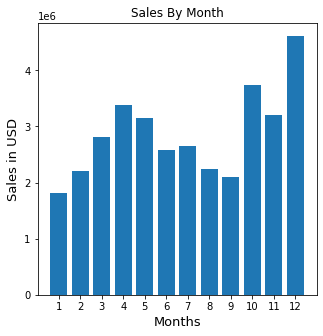

In [363]:
month = range(1,13)
sales = df_1.groupby(["Month"]).sum()["Sales"]
plt.figure(figsize= (5,5))
plt.xticks(month)
plt.xlabel("Months", fontsize=13)
plt.ylabel("Sales in USD", fontsize= 13)
plt.plot()
plt.bar(month,sales)
plt.title("Sales By Month")
plt.show()

### Question 2: What city sold the most product?

In [319]:
df_2 = df
df_2= df_2.drop("Order ID", axis=1)
df_2.groupby("City").sum()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta,16602.00,2779908.20,104794,2795498.58
Austin,11153.00,1809873.61,69829,1819581.75
Boston,22528.00,3637409.77,141112,3661642.01
Dallas,16730.00,2752627.82,104620,2767975.40
Los Angeles,33289.00,5421435.23,208325,5452570.80
New York City,27932.00,4635370.83,175741,4664317.43
Portland,14053.00,2307747.47,87765,2320490.61
San Francisco,50239.00,8211461.74,315520,8262203.91
Seattle,16553.00,2733296.01,104941,2747755.48


### Q2: the city with most sales by far is San Francisco and the city with the least sales is Austin

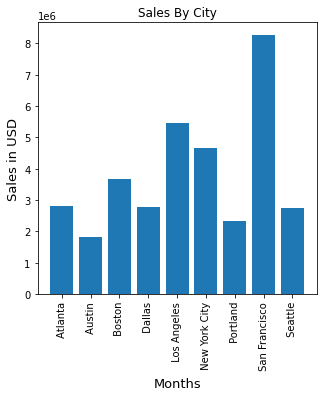

In [375]:
cities= [city for city, df in df.groupby("City")]
sales = df_2.groupby(["City"]).sum()["Sales"]
plt.figure(figsize= (5,5))
plt.xlabel("Months", fontsize=13)
plt.ylabel("Sales in USD", fontsize= 13)
plt.xticks(rotation="vertical")
plt.plot()
plt.bar(cities,sales)
plt.title("Sales By City")
plt.show()

### Question 3: What products sold the most? why did it happened?

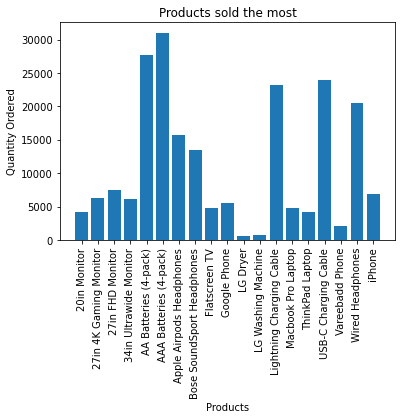

In [416]:
product_group = df_3.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.xlabel("Products")
plt.ylabel("Quantity Ordered")
plt.title("Products sold the most")
plt.xticks(fontsize=10)
plt.show()

### Q3: the product that is sold the most is AAA Batteries(4-pack) followed by AA Bateries(4-pack)

<ipython-input-419-191ca8ddebd4>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=10)
<ipython-input-419-191ca8ddebd4>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


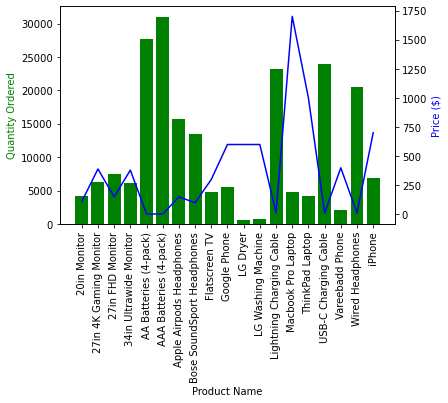

In [419]:
prices = df_3.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=10)

fig.show()

### Q3.1: As shown there is a clear correlation between the price and the quantity ordered by product, in other words, the less expensive the product the more it will be sold.